<center><h1>Final Project Submission</h1></center>
<center><h3>Project Name: Mobile Price Prediction</h3></center>
<center><h3>Course Name: Project Management</h3></center>
<center><h3>Course Code: CSE-417</h3></center>
<center><h3>Submission Date: 28-03-2023</h3></center>
<center><h3>Group : CryptonV2</h3></center>
<center><h3>Md. Alahi Almin Tansen (190321028)</h3></center>
<center><h3>Afsana Mim (200121039)</h3></center>

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Environment Improvement and Cleanup

In [2]:
#show all column name
pd.options.display.max_columns = None
#remove warnings
import warnings
warnings.filterwarnings('ignore')

## Describing The Dataset 

| Feature Name | Description                                               | Data Type   |
| :----------  | :-------------------------------------------------------  | :---------  |
| battery_power | Total energy a battery can store in one time measured in mAh | Numeric     |
|      blue    | Has Bluetooth or not                                       | Binary      |
|  clock_speed | Speed at which microprocessor executes instructions        | Numeric     |
|    dual_sim  | Has dual SIM support or not                                | Binary      |
|       fc     | Front camera mega pixels                                   | Numeric     |
|     four_g   | Has 4G or not                                              | Binary      |
|  int_memory  | Internal memory in gigabytes                               | Numeric     |
|     m_dep    | Mobile depth in cm                                          | Numeric     |
|   mobile_wt  | Weight of mobile phone                                      | Numeric     |
|    n_cores   | Number of cores of processor                                | Numeric     |
|       pc     | Primary camera mega pixels                                  | Numeric     |
|   px_height  | Pixel resolution height                                     | Numeric     |
|   px_width   | Pixel resolution width                                      | Numeric     |
|       ram    | Random access memory in megabytes                           | Numeric     |
|      sc_h    | Screen height of mobile in cm                                | Numeric     |
|      sc_w    | Screen width of mobile in cm                                 | Numeric     |
|   talk_time  | Longest time that a single battery charge will last when you are talking | Numeric |
|    three_g   | Has 3G or not                                               | Binary      |
| touch_screen | Has touch screen or not                                     | Binary      |
|     wifi     | Has Wi-Fi or not                                            | Binary      |
| price_range  | Target variable with value of 0: Lowest Cost, 1: Low Cost, 2: Medium Cost, and 3: High Cost | Categorical |

## Reading Data

In [3]:
df = pd.read_csv('mobile_price.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [4]:
df.shape

(2000, 21)

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
columns = df.columns
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Checking Null Values

In [8]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Plotting Null Values

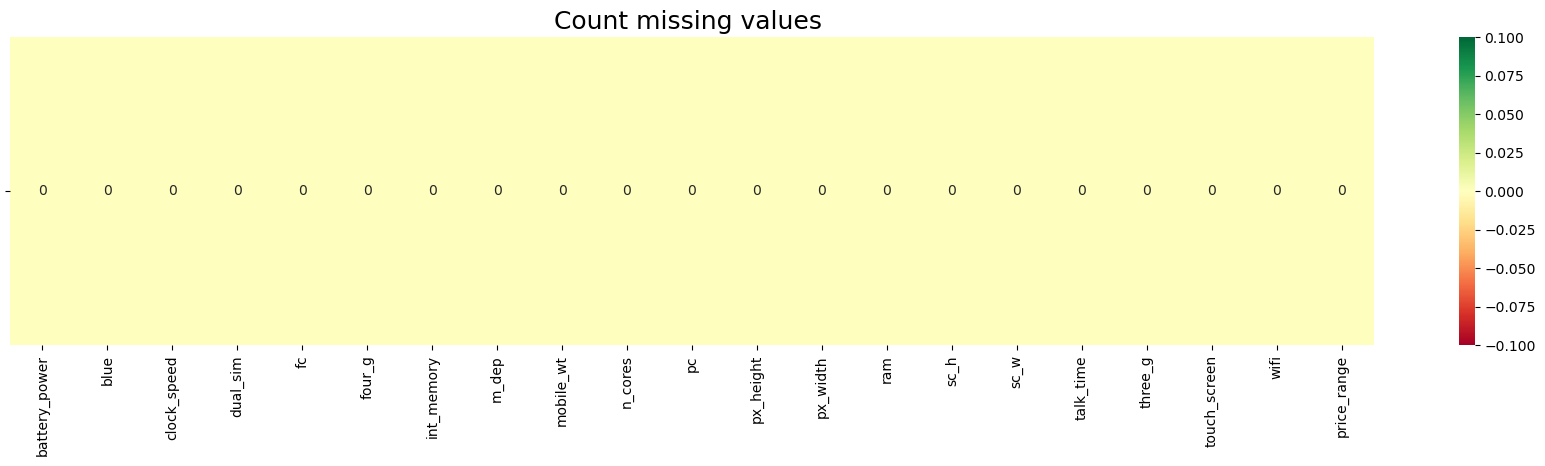

In [9]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='RdYlGn', annot=True,
             fmt='0.0f').set_title('Count missing values ', fontsize=18)
plt.show()

### Check for Duplicates in each column & rows

In [10]:
duplicates = df.duplicated()
print("Number of duplicates in each column:",duplicates.sum())

Number of duplicates in each column: 0


In [11]:
all_duplicates = df.duplicated(keep=False)
print("Number of duplicate rows:",all_duplicates.sum())

Number of duplicate rows: 0


### Data Statistics

In [12]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Plotting data to see which are affecting price range

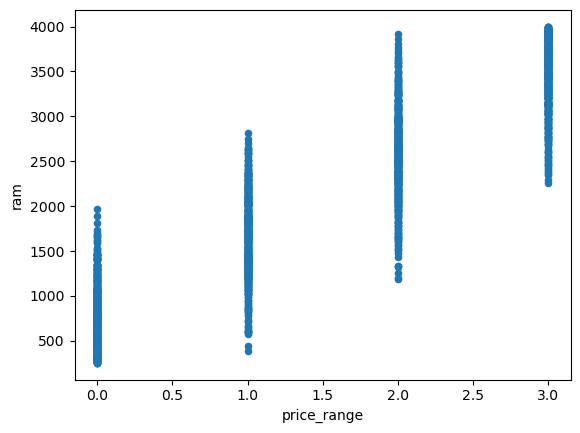

In [13]:
df.plot(x='price_range', y='ram', kind='scatter')
plt.show()

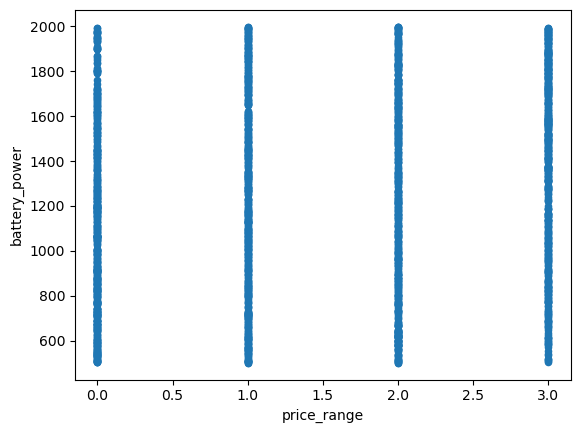

In [14]:
df.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

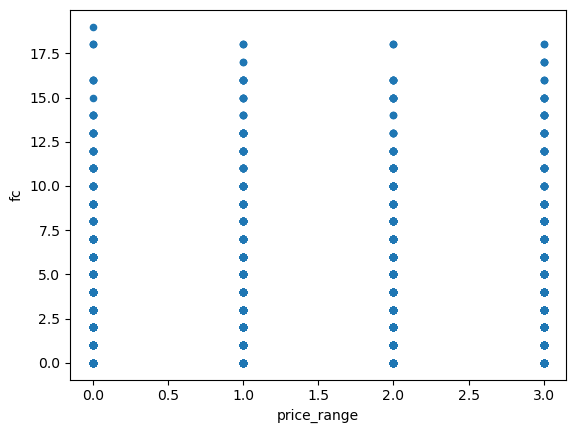

In [15]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

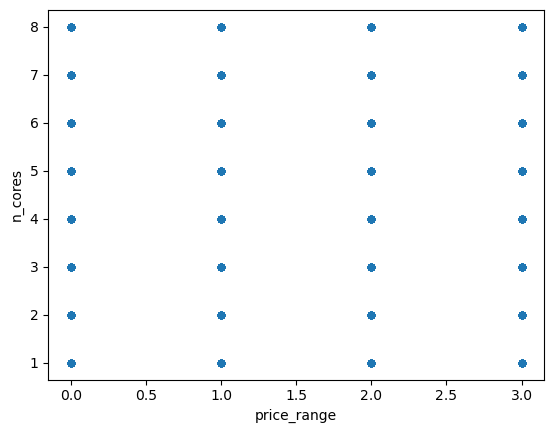

In [16]:
df.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

### Using ExtraTreesClassifier to find the best feature

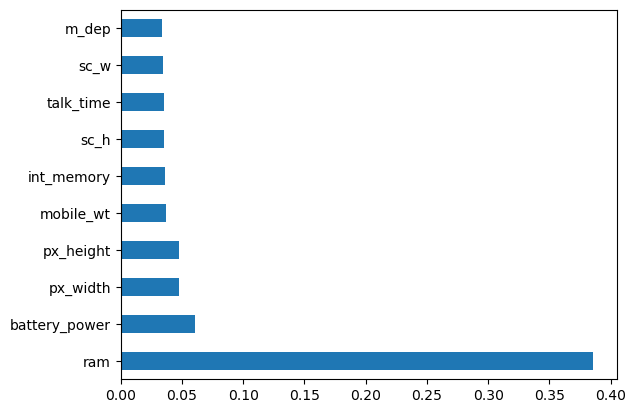

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# load your dataset
X = df.drop(columns=["price_range"])
y = df["price_range"]

# initialize ExtraTreesClassifier
model = ExtraTreesClassifier()

# fit the model to your dataset
model.fit(X, y)

# plot feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Using SelectKBest to get more efficient feature

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# load your dataset
X = df.drop(columns=["price_range"])
y = df["price_range"]

# Select the top 10 features with the highest ANOVA F-value
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Define feature names
feature_names = list(X.columns)

# Create a pandas dataframe of feature scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': selector.scores_})

# Sort the dataframe by feature scores in descending order
scores_df = scores_df.sort_values('Score', ascending=False).reset_index(drop=True)

# Print the dataframe
print(scores_df)

          Feature        Score
0             ram  3520.110824
1   battery_power    31.598158
2        px_width    22.620882
3       px_height    19.484842
4       mobile_wt     3.594318
5      int_memory     2.922996
6         n_cores     2.625415
7            sc_h     2.225984
8            sc_w     1.671000
9       talk_time     1.628811
10          m_dep     1.500682
11   touch_screen     1.293302
12         four_g     1.059525
13             pc     0.825446
14             fc     0.772182
15    clock_speed     0.493708
16           blue     0.476768
17        three_g     0.457320
18       dual_sim     0.428239
19           wifi     0.284940


### Combining SelectKBest with ExtraTreesClassifier 

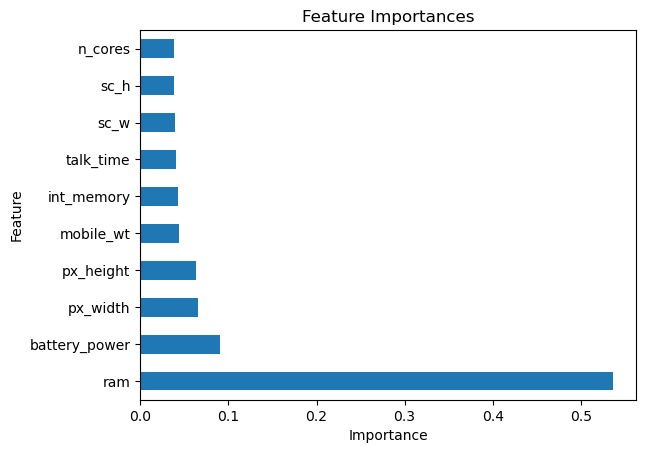

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Split the dataset into X and y
X = df.drop(columns=["price_range"])
y = df["price_range"]

# Feature selection with SelectKBest
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
feature_names = X.columns[selector.get_support()]

# Feature importance with ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_new, y)

# Plot the feature importances
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(k).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Correlation Matrix with Heatmap

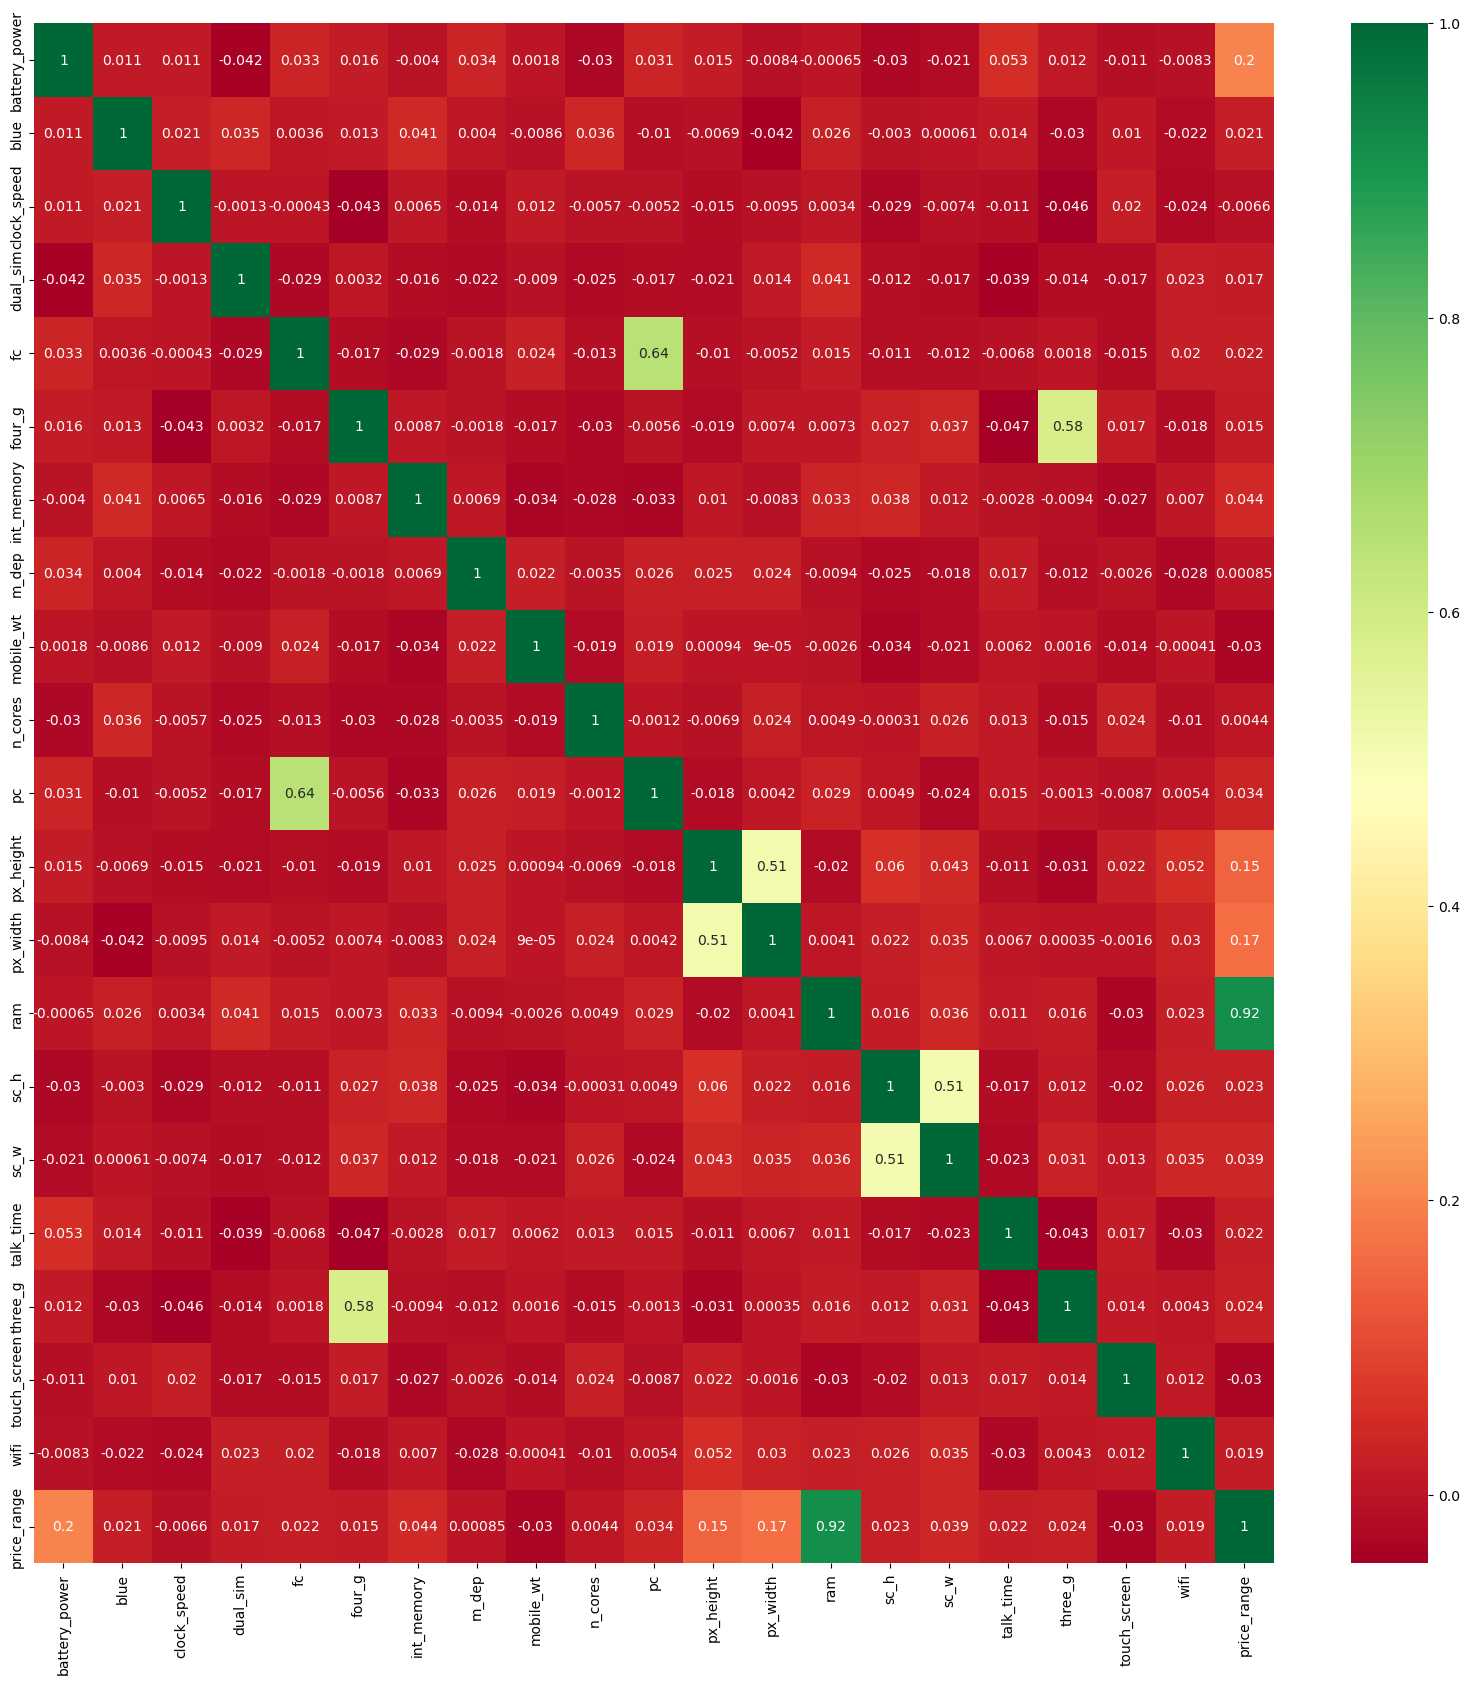

In [20]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Correlation Heatmap According to only Price Range

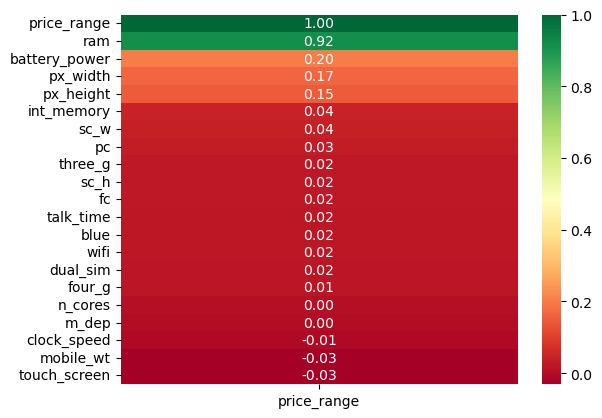

In [21]:
corr = df.corr()['price_range'].sort_values(ascending=False)
sns.heatmap(corr.to_frame(), cmap='RdYlGn', annot=True, fmt='.2f');

### Checking outliers by plotting

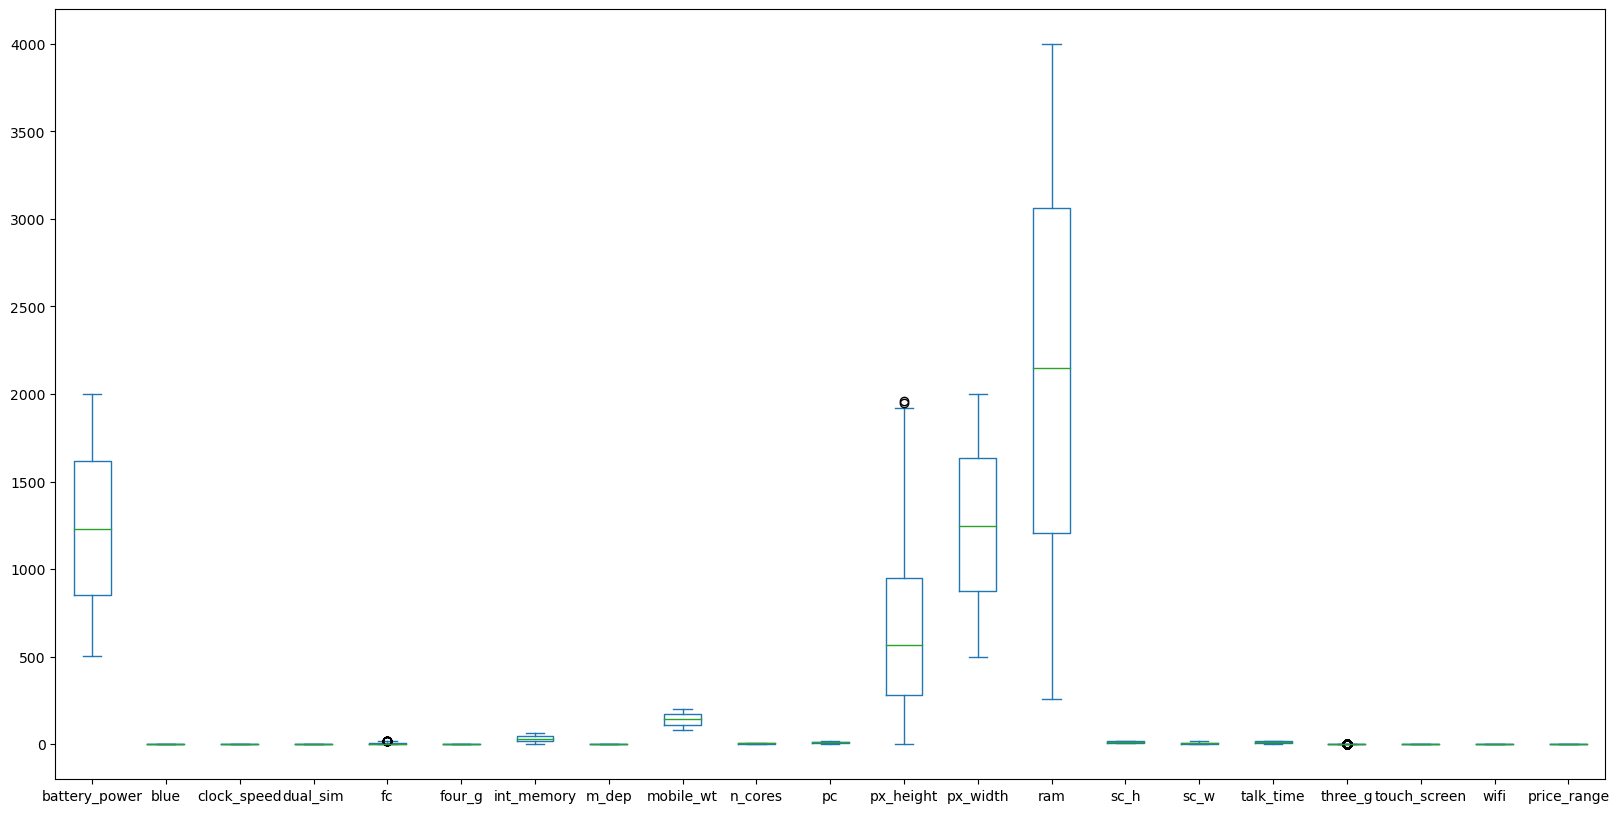

In [22]:
df.plot(kind='box',figsize=(20,10))
plt.show()

There is outlier in fc,px_height & three_g

### Counting outlier 

In [23]:
import pandas as pd
from tabulate import tabulate

# Create an empty list to store outlier information for each column
outliers = []

# Loop over each column in the DataFrame
for col in df.columns:
    # Calculate the first and third quartiles
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find the outliers in the column
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Add the outlier information to the list
    outliers.append({
        'Column': col,
        'Total Count': len(df[col]),
        'Outlier Count': len(col_outliers),
        'Outlier Values': col_outliers.values
    })

# Display the results in a table format
print(tabulate(outliers, headers='keys', tablefmt='fancy_grid'))

╒═══════════════╤═══════════════╤═════════════════╤════════════════════════════════════════════════════════════════════════════╕
│ Column        │   Total Count │   Outlier Count │ Outlier Values                                                             │
╞═══════════════╪═══════════════╪═════════════════╪════════════════════════════════════════════════════════════════════════════╡
│ battery_power │          2000 │               0 │ []                                                                         │
├───────────────┼───────────────┼─────────────────┼────────────────────────────────────────────────────────────────────────────┤
│ blue          │          2000 │               0 │ []                                                                         │
├───────────────┼───────────────┼─────────────────┼────────────────────────────────────────────────────────────────────────────┤
│ clock_speed   │          2000 │               0 │ []                                           

fc & px_height has very less amount of outliers but three_g has 477 outliers!

### Checking the correlation between 'fc','px_height','three_g' & 'price_range'

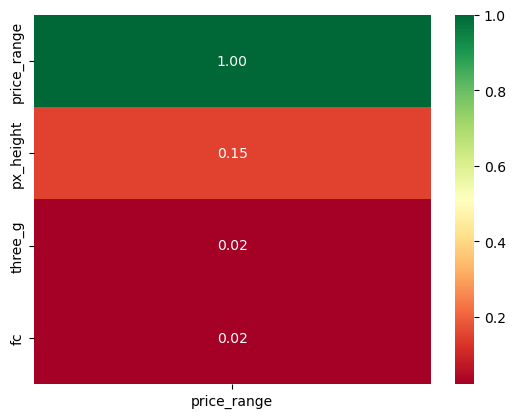

In [24]:
# Select the columns of interest
columns_of_interest = ['fc','px_height','three_g', 'price_range']

# Calculate the correlation matrix between the selected columns
corr = df[columns_of_interest].corr()['price_range'].sort_values(ascending=False)

# Display the correlation matrix for the selected columns as a heatmap
sns.heatmap(corr.to_frame(), cmap='RdYlGn', annot=True, fmt='.2f');

### Observing the difference created by outliers using Z-score test

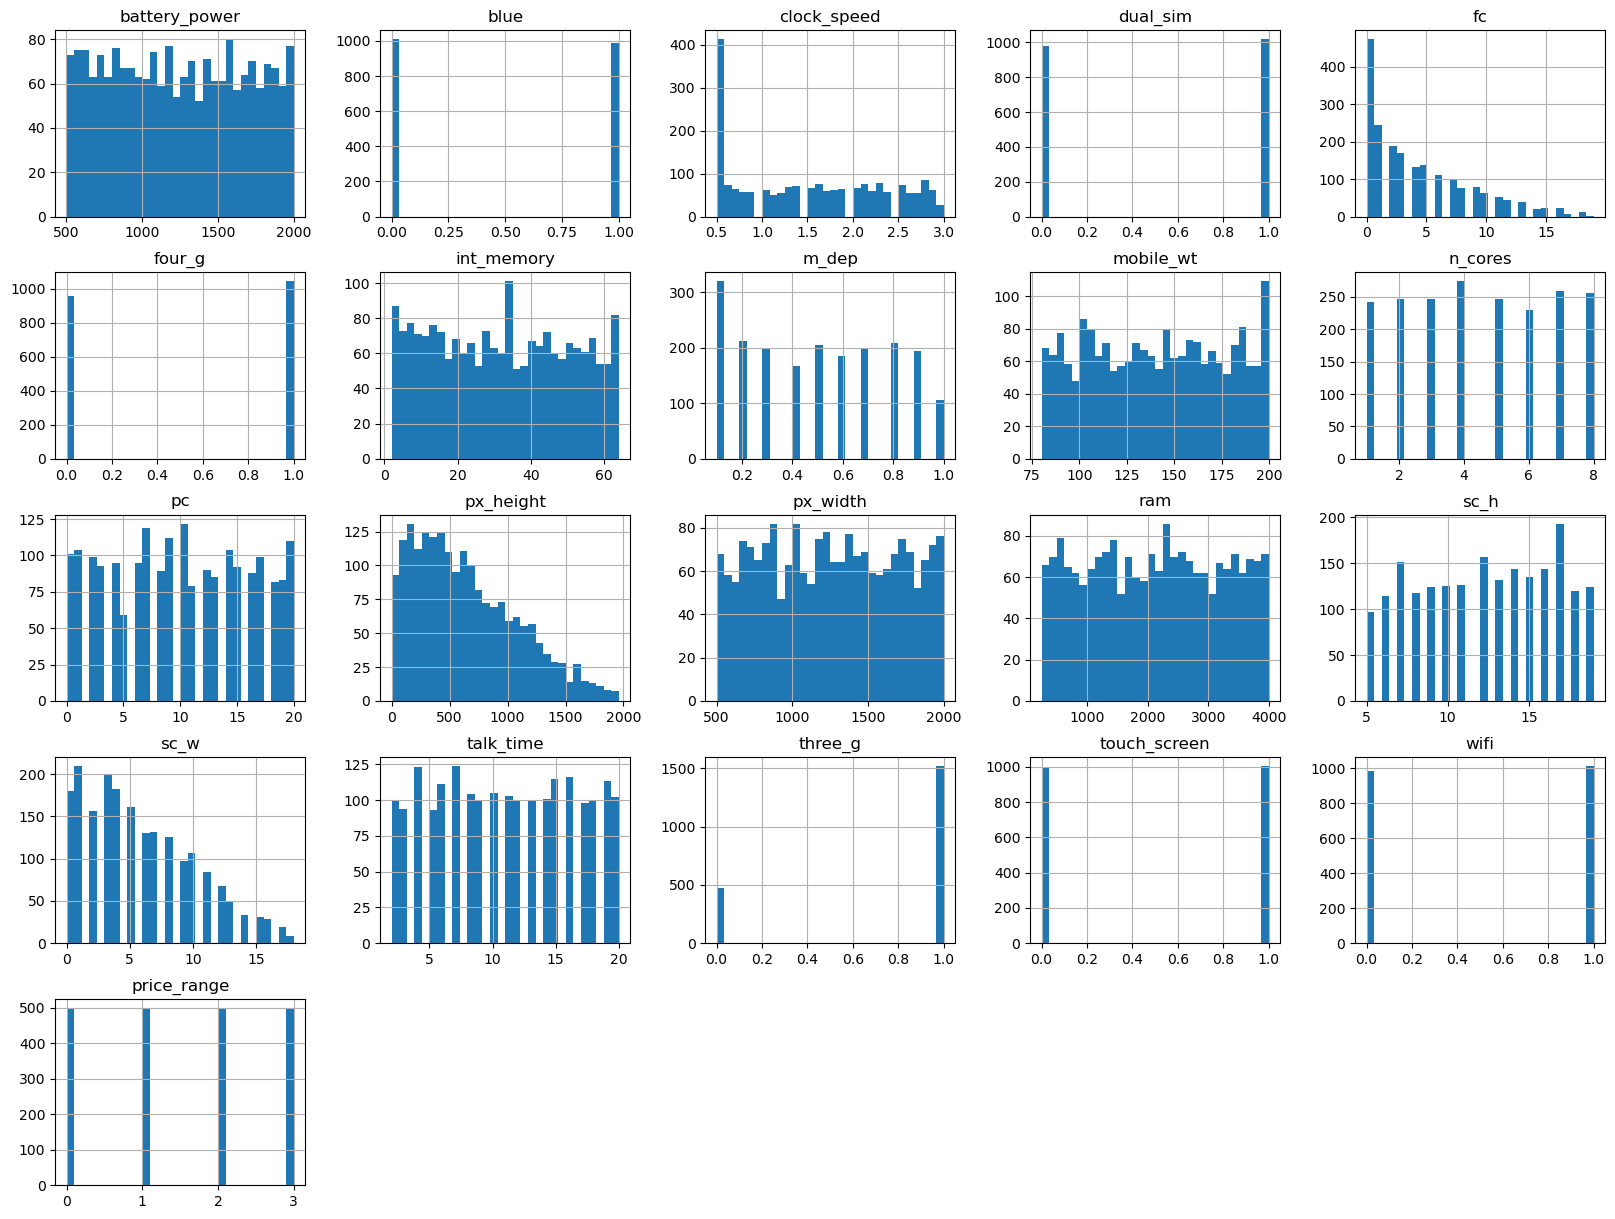

Original dataframe shape: (2000, 21)
Filtered dataframe shape: (1988, 21)


In [25]:
# Visual inspection - plot a histogram of each column to identify any unusual patterns
df.hist(bins=30, figsize=(20,15))
plt.show()

# Statistical tests - identify outliers using the Z-score test
from scipy.stats import zscore

z_scores = df.apply(zscore)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered = df[filtered_entries]

# Compare the filtered and unfiltered data
print(f"Original dataframe shape: {df.shape}")
print(f"Filtered dataframe shape: {df_filtered.shape}")

In [26]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


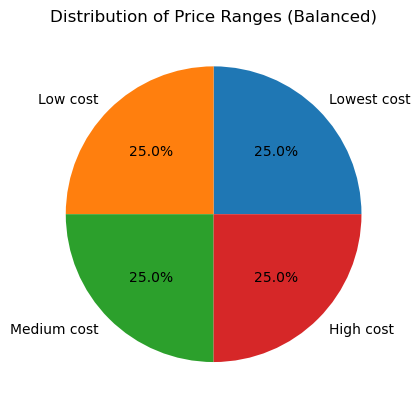

In [27]:
# Count the frequency of each price range category
counts = df['price_range'].value_counts()

# Create a pie chart
plt.pie(counts.values, labels=['Lowest cost','Low cost', 'Medium cost', 'High cost'], autopct='%1.1f%%')
plt.title('Distribution of Price Ranges (Balanced)')
plt.show()

### Experimenting with price range

In [28]:
# Note : Comment out below code lines to create 'three_mobile_price.csv' file otherwise error occur
# Replace all occurrences of 0 with 1 in the "price_range" column
#df['price_range'] = df['price_range'].replace(0, 1)

# Save the updated data to a new CSV file
#df.to_csv('three_mobile_price.csv', index=False)

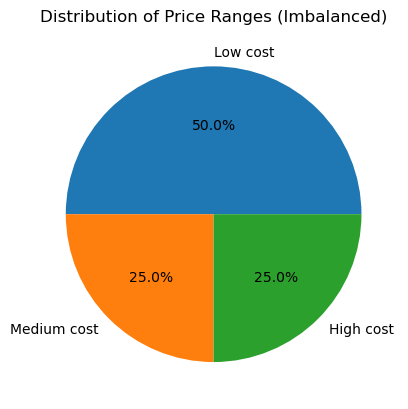

In [29]:
# Count the frequency of each price range category
df2 = pd.read_csv('three_mobile_price.csv')
counts = df2['price_range'].value_counts()

# Create a pie chart
plt.pie(counts.values, labels=['Low cost', 'Medium cost', 'High cost'], autopct='%1.1f%%')
plt.title('Distribution of Price Ranges (Imbalanced)')
plt.show()

### Determining Test Size Using Cross Validation Score

### Observing Decision Tree Test Size

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from IPython.display import HTML

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Results for Decision Tree Classifier:")
html = results_highlighted.render()
display(HTML(html))

Results for Decision Tree Classifier:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.819444,0.829896,0.831148,0.821208,0.820594,0.815278,0.820683,0.798917
1,0.818333,0.821664,0.826777,0.826546,0.816303,0.820674,0.821524,0.805293
2,0.820000,0.822846,0.828027,0.827217,0.817028,0.806813,0.819864,0.805293
3,0.811667,0.830488,0.830527,0.823208,0.817737,0.809884,0.823180,0.799830
4,0.812222,0.818711,0.828658,0.831215,0.822023,0.805278,0.815683,0.798904
5,0.815556,0.831661,0.828021,0.823880,0.804867,0.811423,0.821520,0.806198
6,0.813889,0.822842,0.826154,0.823208,0.814875,0.813742,0.809003,0.802549
7,0.813333,0.824019,0.826154,0.823211,0.817015,0.812964,0.815680,0.801652
8,0.818333,0.828143,0.830527,0.822544,0.809875,0.816047,0.809840,0.798020
9,0.812778,0.822249,0.830525,0.823213,0.815591,0.809106,0.824850,0.799838


### Observing K Nearest Neighbors Test Size

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a K Nearest Neighbors classifier
clf = KNeighborsClassifier()

# Create a standard scaler object
std = StandardScaler()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        # Scale the data using the standard scaler object
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        clf.fit(X_train_std, y_train)
        score = np.mean(cross_val_score(clf, X_train_std, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("K Nearest Neighbors Algorithm:")
html = results_highlighted.render()
display(HTML(html))

K Nearest Neighbors Algorithm:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
1,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
2,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
3,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
4,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
5,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
6,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
7,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
8,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233
9,0.491111,0.500288,0.476538,0.483648,0.462463,0.481898,0.489564,0.472233


### Observing Logistic Regression Test Size

In [32]:
from sklearn.linear_model import LogisticRegression

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a logistic regression classifier
clf = LogisticRegression()

# Create a standard scaler object
std = StandardScaler()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        # Scale the data using the standard scaler object
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        clf.fit(X_train_std, y_train)
        score = np.mean(cross_val_score(clf, X_train_std, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Logistic Regression Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Logistic Regression Algorithm:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
1,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
2,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
3,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
4,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
5,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
6,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
7,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
8,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016
9,0.952222,0.953510,0.950605,0.957975,0.950684,0.940719,0.932437,0.929016


### Observing Multinomial Naive Bayes Test Size

In [33]:
from sklearn.naive_bayes import MultinomialNB

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf.fit(X_train, y_train)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Multinomial Naive Bayes Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Multinomial Naive Bayes Algorithm:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
1,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
2,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
3,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
4,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
5,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
6,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
7,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
8,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254
9,0.513333,0.503819,0.504683,0.507657,0.509629,0.501138,0.486213,0.502254


### Observing Random Forest Test Size

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf.fit(X_train, y_train)
        score = cross_val_score(clf, X_train, y_train, cv=5).mean()
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.1f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Random Forest Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Random Forest Algorithm:


,Test Size 0.1,Test Size 0.2,Test Size 0.3,Test Size 0.4
0,0.871667,0.863125,0.861429,0.869167
1,0.872778,0.871250,0.870000,0.865000
2,0.874444,0.863125,0.865714,0.850000
3,0.884444,0.869375,0.864286,0.871667
4,0.876667,0.862500,0.870714,0.859167
5,0.874444,0.867500,0.865000,0.857500
6,0.878333,0.871250,0.865714,0.865000
7,0.878333,0.865625,0.863571,0.850833
8,0.883889,0.866875,0.863571,0.860000
9,0.879444,0.864375,0.867143,0.859167


### Observing Gradient Boosting Test Size

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        clf.fit(X_train, y_train)
        score = cross_val_score(clf, X_train, y_train, cv=5).mean()
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.1f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("Gradient Boosting Algorithm:")
html = results_highlighted.render()
display(HTML(html))

Gradient Boosting Algorithm:


,Test Size 0.1,Test Size 0.2,Test Size 0.3,Test Size 0.4
0,0.905000,0.893750,0.891429,0.893333
1,0.903333,0.893750,0.890714,0.890000
2,0.904444,0.892500,0.890714,0.890000
3,0.903333,0.893125,0.891429,0.893333
4,0.903333,0.892500,0.891429,0.890000
5,0.905000,0.892500,0.891429,0.890000
6,0.904444,0.893125,0.890714,0.893333
7,0.905000,0.892500,0.890714,0.892500
8,0.904444,0.893125,0.890714,0.890000
9,0.904444,0.892500,0.890714,0.892500


### Observing SVM Test Size

In [36]:
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X = data.drop(['price_range'], axis=1)
y = data['price_range']

# Define range of test sizes to try
test_sizes = np.arange(0.1, 0.5, 0.05)

# Create a SVM classifier with linear kernel
clf = SVC(kernel='linear', probability=True)

# Standardize the features
std = StandardScaler()

# Repeat the cross-validation 10 times and store the results in a list
n_runs = 10
results = []
for run in range(n_runs):
    scores = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        score = np.mean(cross_val_score(clf, X_train_std, y_train, cv=5))
        scores.append(score)
    results.append(scores)

# Convert the results to a dataframe
results_df = pd.DataFrame(results, columns=[f"Test Size {ts:.2f}" for ts in test_sizes])

# Highlight the highest result in each row
results_highlighted = results_df.style.highlight_max(color='#f46d43', axis=1)

# Print the highlighted results in a table format
print("SVM Algorithm with linear kernel:")
html = results_highlighted.render()
display(HTML(html))

SVM Algorithm with linear kernel:


,Test Size 0.10,Test Size 0.15,Test Size 0.20,Test Size 0.25,Test Size 0.30,Test Size 0.35,Test Size 0.40,Test Size 0.45
0,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
1,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
2,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
3,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
4,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
5,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
6,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
7,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
8,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657
9,0.947778,0.949988,0.957482,0.953975,0.953538,0.952269,0.938281,0.932657


## Scaling the data

### Separating Feature and Target Variable
**we don't need to scall target variable**

In [37]:
X=df.drop('price_range',axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [38]:
X.shape

(2000, 20)

In [39]:
y=df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [40]:
y.shape

(2000,)

## Training The Model

### Now Let's Split the data into train and test

In [41]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [42]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [46]:
y_train

968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

In [47]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
1333,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
905,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
1289,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,1379,0,0.5,1,1,0,19,0.3,134,8,17,387,671,3912,11,2,19,0,1,1
1284,991,0,2.0,0,2,1,12,0.3,158,5,6,1209,1678,2014,11,9,10,1,0,0
1739,1044,0,1.8,0,4,1,12,0.7,104,6,5,1230,1263,1794,18,7,19,1,1,1
261,728,0,2.7,1,0,0,25,0.2,88,4,1,526,1529,2039,5,1,12,1,1,1


In [48]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

### Decision Tree Algorithm
**We don't need to use Standard Scaler for Decision Tree since distance doesn't matter here**

In [49]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier on training set
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

# Predict classes for test set
DT_pred = DT_clf.predict(X_test)

# Calculate accuracy of predictions
DT_ACC = accuracy_score(y_test, DT_pred)
print(f"Decision Tree Algorithm Accuracy: {DT_ACC}")

Decision Tree Algorithm Accuracy: 0.8225


### Decision Tree Algorithm Classification report

In [50]:
from sklearn.metrics import classification_report

# Generate classification report
DT_report = classification_report(y_test, DT_pred)

# Print the header
print("Decision Tree Algorithm Classification report")

# Print the report
print(DT_report)

Decision Tree Algorithm Classification report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       105
           1       0.71      0.87      0.78        91
           2       0.79      0.66      0.72        92
           3       0.86      0.91      0.89       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



### K-Nearest Neighbors Algorithm
**We need to use Standard Scaler for knn since distance matter here**

In [51]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features using StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Train K-Nearest Neighbors classifier on training set
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train_std, y_train)

# Predict classes for test set
KNN_pred = KNN_clf.predict(X_test_std)

# Calculate accuracy of predictions
KNN_ACC = accuracy_score(y_test, KNN_pred)
print(f"K-Nearest Neighbors Algorithm Accuracy: {KNN_ACC}")

K-Nearest Neighbors Algorithm Accuracy: 0.53


### K-Nearest Neighbors Algorithm Classification report

In [52]:
from sklearn.metrics import classification_report

# Generate classification report
KNN_report = classification_report(y_test, KNN_pred)

# Print the header
print("K-Nearest Neighbors Algorithm Classification report")

# Print the report
print(KNN_report)

K-Nearest Neighbors Algorithm Classification report
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.34      0.45      0.39        91
           2       0.35      0.37      0.36        92
           3       0.81      0.54      0.65       112

    accuracy                           0.53       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.57      0.53      0.54       400



### Logistic Regression Algorithm

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features using StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Train Logistic Regression classifier on training set
LR_clf = LogisticRegression()
LR_clf.fit(X_train_std, y_train)

# Predict classes for test set
LR_pred = LR_clf.predict(X_test_std)

# Calculate accuracy of predictions
LR_ACC = accuracy_score(y_test, LR_pred)
print(f"Logistic Regression Algorithm Accuracy: {LR_ACC}")

Logistic Regression Algorithm Accuracy: 0.975


### Logistic Regression Algorithm Classification report

In [54]:
from sklearn.metrics import classification_report

# Generate classification report
LR_report = classification_report(y_test, LR_pred)

# Print the header
print("Logistic Regression Algorithm Classification report")

# Print the report
print(LR_report)

Logistic Regression Algorithm Classification report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



### Naive Bayes Algorithm

In [55]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier on training set
NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)

# Predict classes for test set
NB_pred = NB_clf.predict(X_test)

# Calculate accuracy of predictions
NB_ACC = accuracy_score(y_test, NB_pred)
print(f"Naive Bayes Algorithm Accuracy: {NB_ACC}")

Naive Bayes Algorithm Accuracy: 0.5475


### Naive Bayes Algorithm Classification report

In [56]:
from sklearn.metrics import classification_report

# Generate classification report
NB_report = classification_report(y_test, NB_pred)

# Print the header
print("Naive Bayes Algorithm Classification report")

# Print the report
print(NB_report)

Naive Bayes Algorithm Classification report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       105
           1       0.41      0.42      0.42        91
           2       0.38      0.36      0.37        92
           3       0.57      0.61      0.59       112

    accuracy                           0.55       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.55      0.55      0.55       400



### Random Forest Algorithm

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier on training set
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
RF_clf.fit(X_train, y_train)

# Predict classes for test set
RF_pred = RF_clf.predict(X_test)

# Calculate accuracy of predictions
RF_ACC = accuracy_score(y_test, RF_pred)
print(f"Random Forest Algorithm Accuracy: {RF_ACC}")

Random Forest Algorithm Accuracy: 0.8425


### Random Forest Algorithm Classification report

In [58]:
from sklearn.metrics import classification_report

# Generate classification report
RF_report = classification_report(y_test, RF_pred)

# Print the header
print("Random Forest Algorithm Classification report")

# Print the report
print(RF_report)

Random Forest Algorithm Classification report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.80      0.81      0.80        91
           2       0.71      0.75      0.73        92
           3       0.91      0.84      0.87       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



### Gradient Boosting Algorithm

In [59]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier on training set
GB_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5)
GB_clf.fit(X_train, y_train)

# Predict classes for test set
GB_pred = GB_clf.predict(X_test)

# Calculate accuracy of predictions
GB_ACC = accuracy_score(y_test, GB_pred)
print(f"Gradient Boosting Algorithm Accuracy: {GB_ACC}")

Gradient Boosting Algorithm Accuracy: 0.9175


### Gradient Boosting Algorithm Classification report

In [60]:
from sklearn.metrics import classification_report

# Generate classification report
GB_report = classification_report(y_test, GB_pred)

# Print the header
print("Gradient Boosting Algorithm Classification report")

# Print the report
print(GB_report)

Gradient Boosting Algorithm Classification report
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.95      0.91        91
           2       0.87      0.87      0.87        92
           3       0.94      0.90      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### Support Vector Machines(SVM)

In [61]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your dataset into a pandas DataFrame
df = pd.read_csv('mobile_price.csv')

# Split dataset into input features (X) and target variable (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale input features using StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Train SVM classifier on training set
SVM_clf = SVC(kernel='linear', probability=True)
SVM_clf.fit(X_train_std, y_train)

# Predict classes for test set
SVM_pred = SVM_clf.predict(X_test_std)

# Calculate accuracy of predictions
SVM_ACC = accuracy_score(y_test, SVM_pred)
print(f"Support Vector Machines(SVM) Algorithm Accuracy: {SVM_ACC}")

Support Vector Machines(SVM) Algorithm Accuracy: 0.97


### Support Vector Machines(SVM) Algorithm Classification report

In [62]:
from sklearn.metrics import classification_report

# Generate classification report
SVM_report = classification_report(y_test, SVM_pred)

# Print the header
print("Support Vector Machines(SVM) Algorithm Classification report")

# Print the report
print(SVM_report)

Support Vector Machines(SVM) Algorithm Classification report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.90      1.00      0.95        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



### Accuracy Comparison of Seven Algorithms

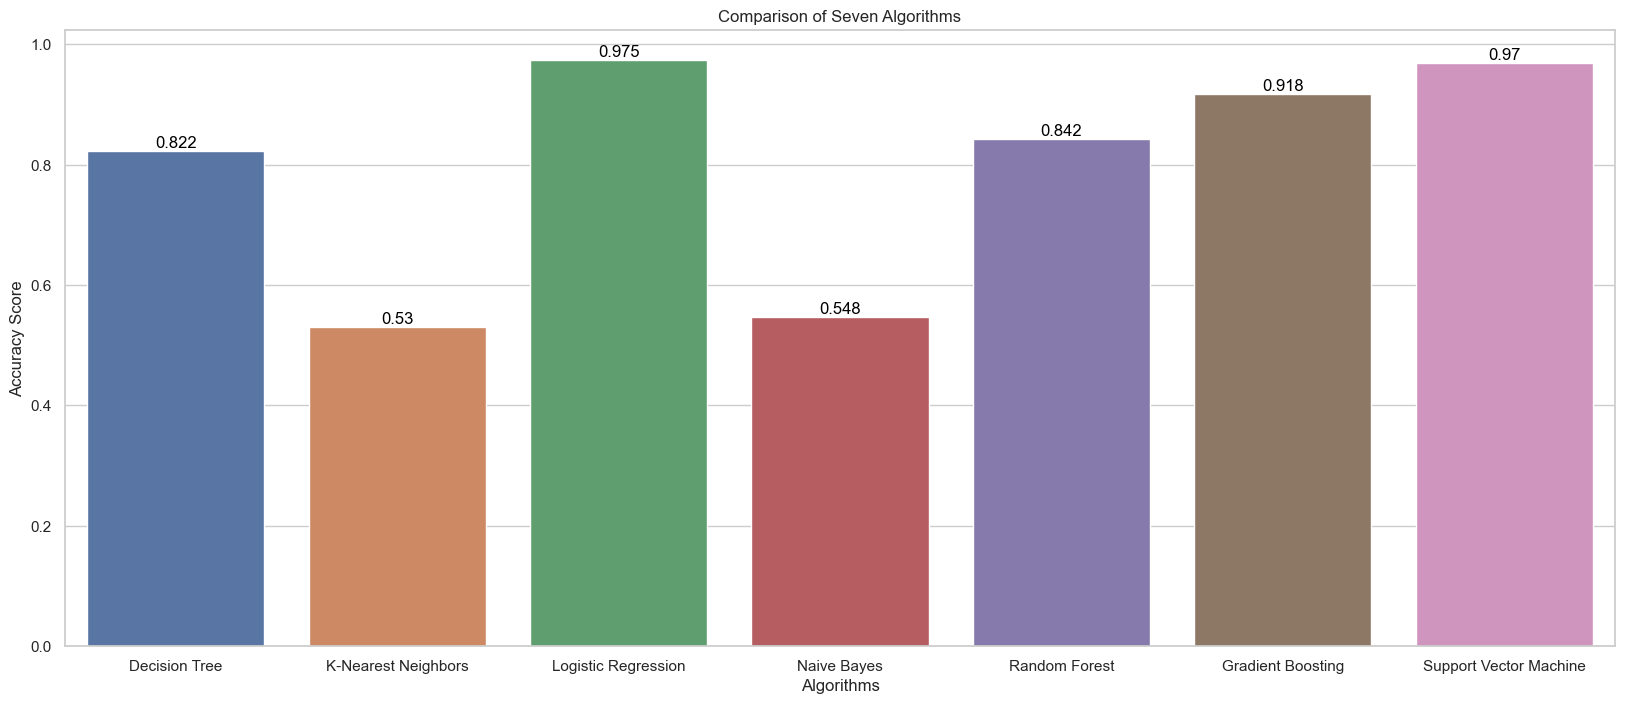

In [63]:
algorithms = ['Decision Tree', 'K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
accuracy_scores = [DT_ACC, KNN_ACC, LR_ACC, NB_ACC, RF_ACC, GB_ACC, SVM_ACC]

sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))

ax = sns.barplot(x=algorithms, y=accuracy_scores)
ax.set_title('Comparison of Seven Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy Score')

for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.005, str(round(v, 3)), fontsize=12, color='black', ha='center')

plt.show()

### Creating a Custom Function for Comparing Metrics

In [64]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns=[model_name])
    
    # Adding background gradient and color scale
    cmap = 'YlGnBu'  # Choose colormap
    vmin = result.min().min()
    vmax = result.max().max()
    styled_result = result.style.background_gradient(cmap=cmap, vmin=vmin, vmax=vmax)

    return styled_result

### Now using the above function calculating Accuracy,Precision,Recall,F1-score 

In [65]:
DT_result = metrics_calculator(y_test, DT_pred, 'Decision Tree')
KNN_result = metrics_calculator(y_test, KNN_pred, 'K-Nearest Neighbors')
LR_result = metrics_calculator(y_test, LR_pred, 'Logistic Regression')
NB_result = metrics_calculator(y_test, NB_pred, 'Naive Bayes')
RF_result = metrics_calculator(y_test, RF_pred, 'Random Forest')
GB_result = metrics_calculator(y_test, GB_pred, 'Gradient Boosting')
SVM_result = metrics_calculator(y_test, SVM_pred, 'Support Vector Machine')

# Convert styled DataFrames to regular DataFrames
decision_tree_result_df = DT_result.data
knn_result_df = KNN_result.data
logistic_regression_result_df = LR_result.data
naive_bayes_result_df = NB_result.data
random_forest_result_df = RF_result.data
gradient_boosting_result_df = GB_result.data
support_vector_machine_result_df = SVM_result.data

Seven_models = pd.concat([decision_tree_result_df, knn_result_df, logistic_regression_result_df, naive_bayes_result_df, random_forest_result_df, gradient_boosting_result_df, support_vector_machine_result_df], axis=1)

# Applying styling to the concatenated DataFrame
styled_seven = Seven_models.style\
    .set_properties(**{'text-align': 'center', 'border': '1px solid black !important'})\
    .set_table_attributes('class="dataframe"')\
    .set_caption('Seven Model Performance Metrics')\
    .background_gradient(cmap='YlGnBu', vmin=Seven_models.min().min(), vmax=Seven_models.max().max())

display(styled_seven)

,Decision Tree,K-Nearest Neighbors,Logistic Regression,Naive Bayes,Random Forest,Gradient Boosting,Support Vector Machine
Accuracy,0.822500,0.530000,0.975000,0.547500,0.842500,0.917500,0.970000
Precision,0.824364,0.551409,0.975116,0.536223,0.838560,0.915407,0.970862
Recall,0.817615,0.522142,0.974657,0.536331,0.838713,0.917197,0.969746
F1-score,0.816491,0.528238,0.974409,0.536016,0.838080,0.915943,0.969163


### Creating Ensemble methods
**Creating Ensemble to observe and improve prediction**

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the mobile price dataset into a Pandas dataframe
df = pd.read_csv('mobile_price.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price_range', axis=1), df['price_range'], test_size=0.2, random_state=42)

# Create individual classifiers
dt_classifier = DecisionTreeClassifier()

lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Create a bagging classifier using decision tree as base estimator
bagging_clf = BaggingClassifier(base_estimator=dt_classifier)

# Create a boosting classifier using gradient boosting
boosting_clf = GradientBoostingClassifier()

# Create a stacking classifier using logistic regression as meta-estimator and decision tree, random forest, gradient boosting and SVM classifiers as base estimators
stacking_clf = StackingClassifier(estimators=[('dt', dt_classifier), ('rf', rf_classifier), ('gb', gb_classifier), ('svm', svm_pipeline)], final_estimator=LogisticRegression())

# Create a voting classifier using decision tree, logistic regression, random forest, gradient boosting and SVM classifiers
voting_clf = VotingClassifier(estimators=[('dt', dt_classifier), ('lr', lr_pipeline), ('rf', rf_classifier), ('gb', gb_classifier), ('svm', svm_pipeline)],voting='soft')

# Train each classifier on your data
bagging_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# Evaluate the performance of each classifier on your test data
bagging_score = bagging_clf.score(X_test, y_test)
boosting_score = boosting_clf.score(X_test, y_test)
stacking_score = stacking_clf.score(X_test, y_test)
voting_score = voting_clf.score(X_test, y_test)

# Print the accuracy score for each classifier
print("Bagging Classifier Accuracy Score:", bagging_score)
print("Boosting Classifier Accuracy Score:", boosting_score)
print("Stacking Classifier Accuracy Score:", stacking_score)
print("Voting Classifier Accuracy Score:", voting_score)

Bagging Classifier Accuracy Score: 0.8725
Boosting Classifier Accuracy Score: 0.905
Stacking Classifier Accuracy Score: 0.9675
Voting Classifier Accuracy Score: 0.9325


### Accuracy Comparison of Ensemble Models

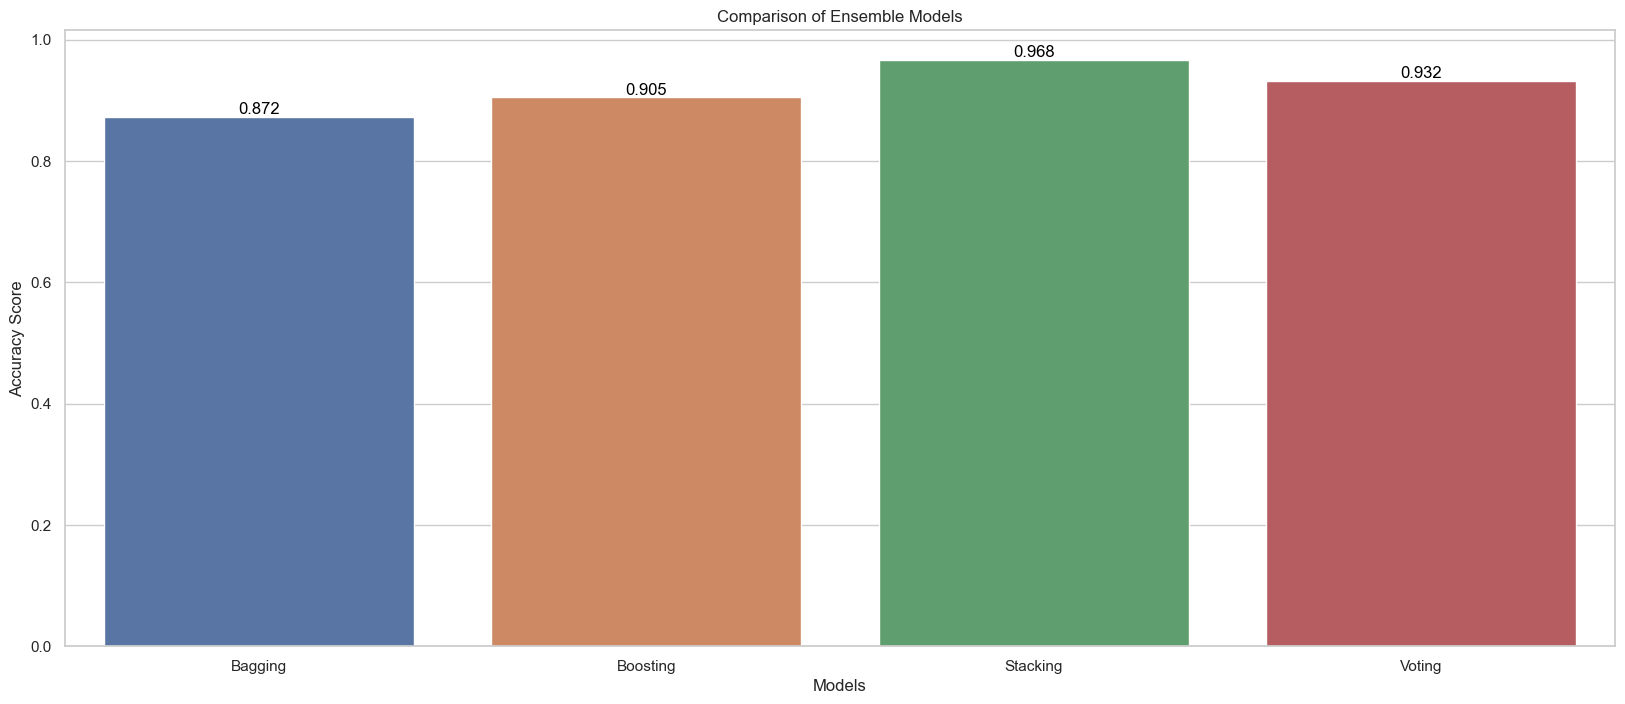

In [67]:
algorithms = ['Bagging', 'Boosting', 'Stacking', 'Voting']
accuracy_scores = [bagging_score,boosting_score, stacking_score, voting_score]

sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))

ax = sns.barplot(x=algorithms, y=accuracy_scores)
ax.set_title('Comparison of Ensemble Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')

for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.005, str(round(v, 3)), fontsize=12, color='black', ha='center')

plt.show()

### Classification Report of Ensemble Models

In [68]:
from sklearn.metrics import classification_report

# Evaluate the performance of each classifier on your test data
bagging_predictions = bagging_clf.predict(X_test)
boosting_predictions = boosting_clf.predict(X_test)
stacking_predictions = stacking_clf.predict(X_test)
voting_predictions = voting_clf.predict(X_test)

# Store the classification report for each classifier in a variable
bagging_report = classification_report(y_test, bagging_predictions)
boosting_report = classification_report(y_test, boosting_predictions)
stacking_report = classification_report(y_test, stacking_predictions)
voting_report = classification_report(y_test, voting_predictions)

# Print the classification report for each classifier
print("Bagging Classifier Classification Report:")
print(bagging_report)

print("Boosting Classifier Classification Report:")
print(boosting_report)

print("Stacking Classifier Classification Report:")
print(stacking_report)

print("Voting Classifier Classification Report:")
print(voting_report)

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       105
           1       0.79      0.89      0.84        91
           2       0.82      0.79      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400

Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

Stacking Classifier Classification Report:
  

### Cross-validated Score & Accuracy of Ensemble Models

In [69]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train each classifier on your data
bagging_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy for each classifier
predictions_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(predictions_bagging, y_test)
print('Bagging Classifier Accuracy:', accuracy_bagging)

predictions_boosting = boosting_clf.predict(X_test)
accuracy_boosting = accuracy_score(predictions_boosting, y_test)
print('Boosting Classifier Accuracy:', accuracy_boosting)

predictions_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(predictions_stacking, y_test)
print('Stacking Classifier Accuracy:', accuracy_stacking)

predictions_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(predictions_voting, y_test)
print('Voting Classifier Accuracy:', accuracy_voting)

# calculate and print the mean cross-validated score of each ensemble model
cross_val_scores_bagging = cross_val_score(bagging_clf, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagging Classifier Model:', cross_val_scores_bagging.mean())

cross_val_scores_boosting = cross_val_score(boosting_clf, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Gradient Boosting Classifier Model:', cross_val_scores_boosting.mean())

cross_val_scores_stacking = cross_val_score(stacking_clf, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Stacking Classifier Model:', cross_val_scores_stacking.mean())

cross_val_scores_voting = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Voting Classifier Model:', cross_val_scores_voting.mean())

Bagging Classifier Accuracy: 0.87
Boosting Classifier Accuracy: 0.905
Stacking Classifier Accuracy: 0.97
Voting Classifier Accuracy: 0.9325
Cross-validated Score of the Bagging Classifier Model: 0.875
Cross-validated Score of the Gradient Boosting Classifier Model: 0.8999999999999998
Cross-validated Score of the Stacking Classifier Model: 0.9568749999999999
Cross-validated Score of the Voting Classifier Model: 0.92875


### Creating a Custom Function for Comparing Metrics of Ensemble Models

In [70]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns=[model_name])
    
    # Adding background gradient and color scale
    cmap = 'YlGnBu'  # Choose colormap
    vmin = result.min().min()
    vmax = result.max().max()
    styled_result = result.style.background_gradient(cmap=cmap, vmin=vmin, vmax=vmax)

    return styled_result

### Now using the above function calculating Accuracy,Precision,Recall,F1-score

In [71]:
Bagging_Classifier_result = metrics_calculator(y_test, predictions_bagging, 'Bagging Classifier')
Bagging_Classifier_result

,Bagging Classifier
Accuracy,0.870000
Precision,0.866419
Recall,0.866971
F1-score,0.866497


In [72]:
Boosting_Classifier_result = metrics_calculator(y_test, predictions_boosting, 'Boosting Classifier')
Boosting_Classifier_result

,Boosting Classifier
Accuracy,0.905000
Precision,0.902676
Recall,0.903639
F1-score,0.902937


In [73]:
Stacking_Classifier_result = metrics_calculator(y_test, predictions_stacking, 'Stacking Classifier')
Stacking_Classifier_result

,Stacking Classifier
Accuracy,0.970000
Precision,0.970312
Recall,0.969222
F1-score,0.968959


In [74]:
Voting_Classifier_result = metrics_calculator(y_test, predictions_voting, 'Voting Classifier')
Voting_Classifier_result

,Voting Classifier
Accuracy,0.932500
Precision,0.932596
Recall,0.931531
F1-score,0.930431


### Performance Metrics of Ensemble Models

In [75]:
Bagging_Classifier_result = metrics_calculator(y_test, predictions_bagging, 'Bagging Classifier')
Boosting_Classifier_result = metrics_calculator(y_test, predictions_boosting, 'Boosting Classifier')
Stacking_Classifier_result = metrics_calculator(y_test, predictions_stacking, 'Stacking Classifier')
Voting_Classifier_result = metrics_calculator(y_test, predictions_voting, 'Voting Classifier')

# Convert styled DataFrames to regular DataFrames
Bagging_Classifier_result_df = Bagging_Classifier_result.data
Boosting_Classifier_result_df = Boosting_Classifier_result.data
Stacking_Classifier_result_df = Stacking_Classifier_result.data
Voting_Classifier_result_df = Voting_Classifier_result.data

Ensemble_models = pd.concat([Bagging_Classifier_result_df, Boosting_Classifier_result_df, Stacking_Classifier_result_df, Voting_Classifier_result_df], axis=1)

# Applying styling to the concatenated DataFrame
styled_ensemble = Ensemble_models.style\
    .set_properties(**{'text-align': 'center', 'border': '1px solid black !important'})\
    .set_table_attributes('class="dataframe"')\
    .set_caption('Ensemble Model Performance Metrics')\
    .background_gradient(cmap='YlGnBu', vmin=Ensemble_models.min().min(), vmax=Ensemble_models.max().max())

display(styled_ensemble)

,Bagging Classifier,Boosting Classifier,Stacking Classifier,Voting Classifier
Accuracy,0.870000,0.905000,0.970000,0.932500
Precision,0.866419,0.902676,0.970312,0.932596
Recall,0.866971,0.903639,0.969222,0.931531
F1-score,0.866497,0.902937,0.968959,0.930431


### Confusion Matrix of Ensemble Models

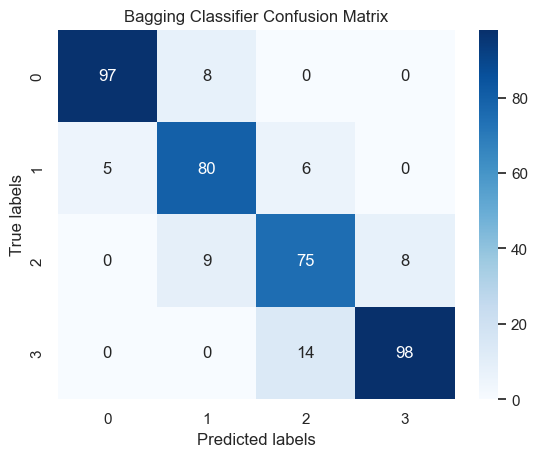

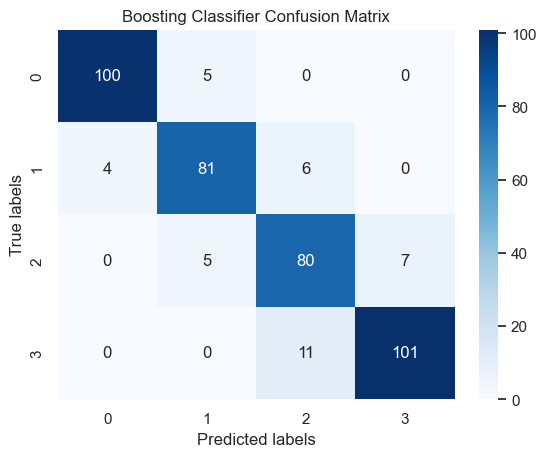

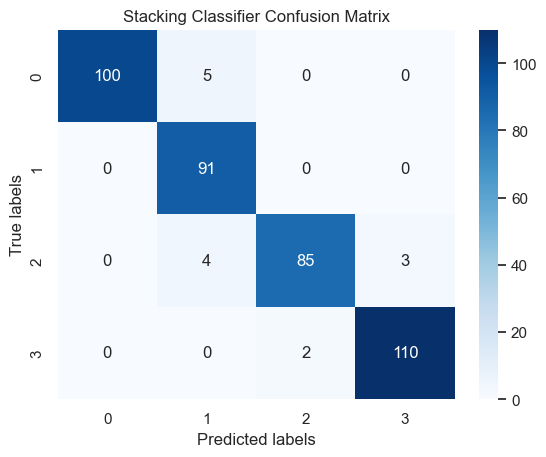

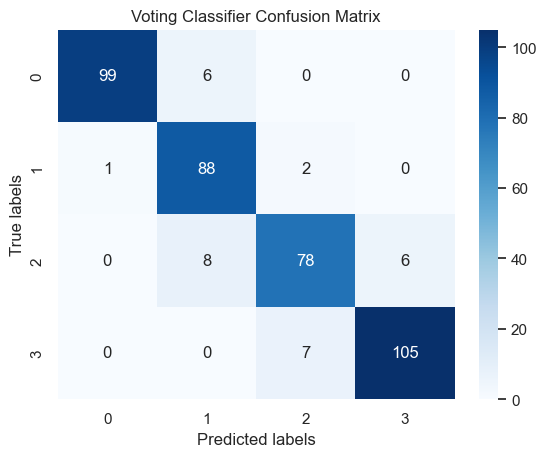

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, title):
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    plt.show()

# Train each classifier on your data
bagging_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# Evaluate the performance of each classifier on your test data
bagging_pred = bagging_clf.predict(X_test)
bagging_cm = confusion_matrix(y_test, bagging_pred)

boosting_pred = boosting_clf.predict(X_test)
boosting_cm = confusion_matrix(y_test, boosting_pred)

stacking_pred = stacking_clf.predict(X_test)
stacking_cm = confusion_matrix(y_test, stacking_pred)

voting_pred = voting_clf.predict(X_test)
voting_cm = confusion_matrix(y_test, voting_pred)

# Plot the confusion matrix for each classifier
plot_confusion_matrix(bagging_cm, "Bagging Classifier Confusion Matrix")
plot_confusion_matrix(boosting_cm, "Boosting Classifier Confusion Matrix")
plot_confusion_matrix(stacking_cm, "Stacking Classifier Confusion Matrix")
plot_confusion_matrix(voting_cm, "Voting Classifier Confusion Matrix")

### ROC & AUC of Ensemble Models

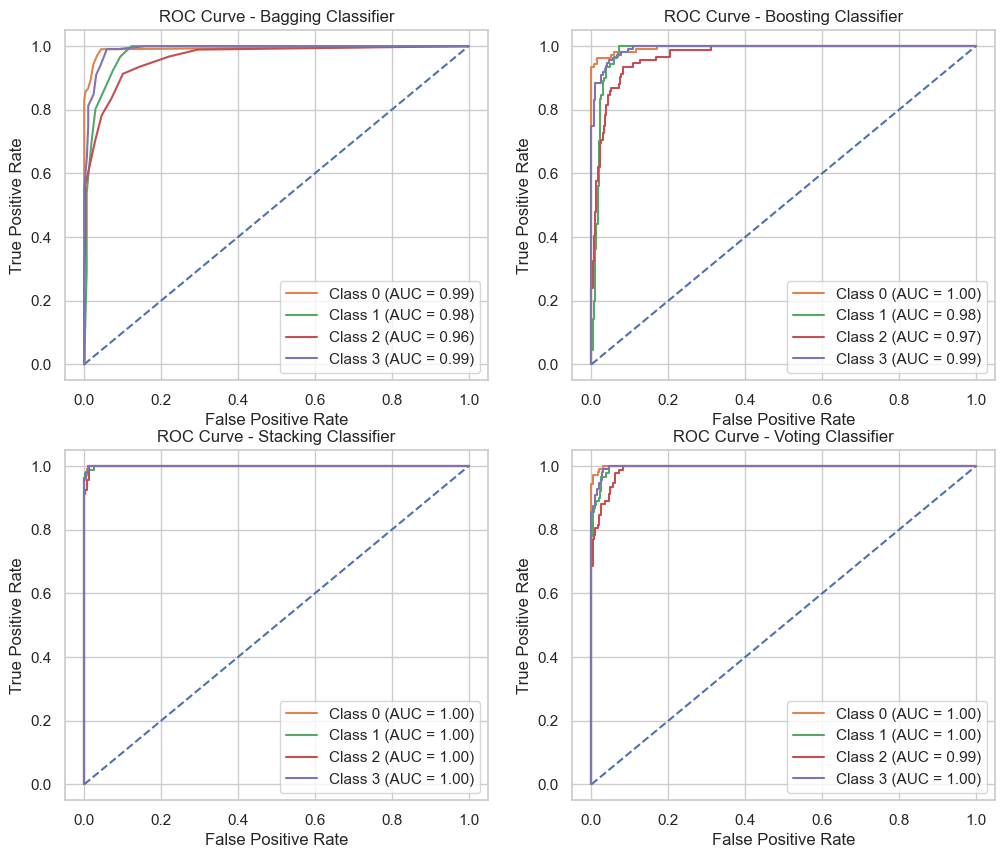

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert the target variable to binary form using one-vs-all (OvA) strategy
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binary.shape[1]

# Train each classifier on your data
bagging_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# Compute the predicted probabilities for each classifier
bagging_prob = bagging_clf.predict_proba(X_test)
boosting_prob = boosting_clf.predict_proba(X_test)
stacking_prob = stacking_clf.predict_proba(X_test)
voting_prob = voting_clf.predict_proba(X_test)

# Compute the false positive rate and true positive rate for each classifier
bagging_fpr = dict()
bagging_tpr = dict()
bagging_roc_auc = dict()
for i in range(n_classes):
    bagging_fpr[i], bagging_tpr[i], _ = roc_curve(y_test_binary[:, i], bagging_prob[:, i])
    bagging_roc_auc[i] = auc(bagging_fpr[i], bagging_tpr[i])

boosting_fpr = dict()
boosting_tpr = dict()
boosting_roc_auc = dict()
for i in range(n_classes):
    boosting_fpr[i], boosting_tpr[i], _ = roc_curve(y_test_binary[:, i], boosting_prob[:, i])
    boosting_roc_auc[i] = auc(boosting_fpr[i], boosting_tpr[i])

stacking_fpr = dict()
stacking_tpr = dict()
stacking_roc_auc = dict()
for i in range(n_classes):
    stacking_fpr[i], stacking_tpr[i], _ = roc_curve(y_test_binary[:, i], stacking_prob[:, i])
    stacking_roc_auc[i] = auc(stacking_fpr[i], stacking_tpr[i])

voting_fpr = dict()
voting_tpr = dict()
voting_roc_auc = dict()
for i in range(n_classes):
    voting_fpr[i], voting_tpr[i], _ = roc_curve(y_test_binary[:, i], voting_prob[:, i])
    voting_roc_auc[i] = auc(voting_fpr[i], voting_tpr[i])

# Plot the ROC curve for each classifier
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    axs[0, 0].plot(bagging_fpr[i], bagging_tpr[i], label=f"Class {i} (AUC = {bagging_roc_auc[i]:.2f})");
axs[0, 0].set_xlabel('False Positive Rate');
axs[0, 0].set_ylabel('True Positive Rate');
axs[0, 0].set_title('ROC Curve - Bagging Classifier');
axs[0, 0].legend(loc="lower right");

axs[0, 1].plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    axs[0, 1].plot(boosting_fpr[i], boosting_tpr[i], label=f"Class {i} (AUC = {boosting_roc_auc[i]:.2f})");
axs[0, 1].set_xlabel('False Positive Rate');
axs[0, 1].set_ylabel('True Positive Rate');
axs[0, 1].set_title('ROC Curve - Boosting Classifier');
axs[0, 1].legend(loc="lower right");

axs[1, 0].plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    axs[1, 0].plot(stacking_fpr[i], stacking_tpr[i], label=f"Class {i} (AUC = {stacking_roc_auc[i]:.2f})");
axs[1, 0].set_xlabel('False Positive Rate');
axs[1, 0].set_ylabel('True Positive Rate');
axs[1, 0].set_title('ROC Curve - Stacking Classifier');
axs[1, 0].legend(loc="lower right");

axs[1, 1].plot([0, 1], [0, 1], linestyle='--')
for i in range(n_classes):
    axs[1, 1].plot(voting_fpr[i], voting_tpr[i], label=f"Class {i} (AUC = {voting_roc_auc[i]:.2f})");
axs[1, 1].set_xlabel('False Positive Rate');
axs[1, 1].set_ylabel('True Positive Rate');
axs[1, 1].set_title('ROC Curve - Voting Classifier');
axs[1, 1].legend(loc="lower right");

# Conclusion
### Stacking Classifier is giving best performance compared to other Ensemble Models

# For UI Design 

### Custom predict

In [78]:
input_data = np.array([[1821, 0.0, 1.7, 0.0, 4.0, 1.0, 10.0, 0.8, 139.0, 8.0, 10.0, 381.0, 1018.0, 3220.0, 13.0, 8.0, 18.0, 1.0, 0.0, 1.0]])

In [79]:
Cus_pred=DT_clf.predict(input_data)

In [80]:
Cus_pred

array([3], dtype=int64)

### Checking uniqe values 
**To get range idea for ui design**

In [81]:
for i in sorted(df, key=lambda x: len(df[x].unique())):
    print(i, ":", len(df[i].unique()))

blue : 2
dual_sim : 2
four_g : 2
three_g : 2
touch_screen : 2
wifi : 2
price_range : 4
n_cores : 8
m_dep : 10
sc_h : 15
sc_w : 19
talk_time : 19
fc : 20
pc : 21
clock_speed : 26
int_memory : 63
mobile_wt : 121
battery_power : 1094
px_width : 1109
px_height : 1137
ram : 1562


### Uniqe Value Count and Percentage

In [82]:
from tabulate import tabulate

total_count = df.shape[0]

columns_to_display = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range', 'n_cores'] #add more to observe

# Define the sort parameter ('ascending' or 'descending')
sort = 'descending'

for column in columns_to_display:
    unique_counts = df[column].value_counts().sort_index(ascending=(sort=='ascending'))
    percent_unique = unique_counts / total_count * 100
    data = []
    headers = ['Unique Value', 'Count', 'Percentage']
    for value, count, percent in zip(unique_counts.index, unique_counts.values, percent_unique.values):
        data.append([value, count, f"{percent:.2f}%"])
    print(f"\n{column}:")
    print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


blue:
╒════════════════╤═════════╤══════════════╕
│   Unique Value │   Count │ Percentage   │
╞════════════════╪═════════╪══════════════╡
│              1 │     990 │ 49.50%       │
├────────────────┼─────────┼──────────────┤
│              0 │    1010 │ 50.50%       │
╘════════════════╧═════════╧══════════════╛

dual_sim:
╒════════════════╤═════════╤══════════════╕
│   Unique Value │   Count │ Percentage   │
╞════════════════╪═════════╪══════════════╡
│              1 │    1019 │ 50.95%       │
├────────────────┼─────────┼──────────────┤
│              0 │     981 │ 49.05%       │
╘════════════════╧═════════╧══════════════╛

four_g:
╒════════════════╤═════════╤══════════════╕
│   Unique Value │   Count │ Percentage   │
╞════════════════╪═════════╪══════════════╡
│              1 │    1043 │ 52.15%       │
├────────────────┼─────────┼──────────────┤
│              0 │     957 │ 47.85%       │
╘════════════════╧═════════╧══════════════╛

three_g:
╒════════════════╤═════════╤═══════════

### Ploting unique values

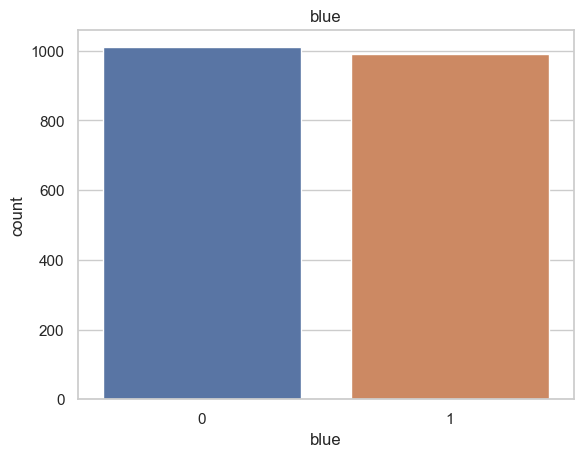

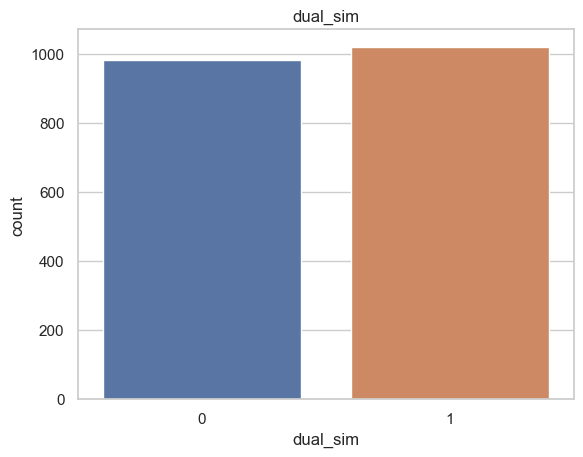

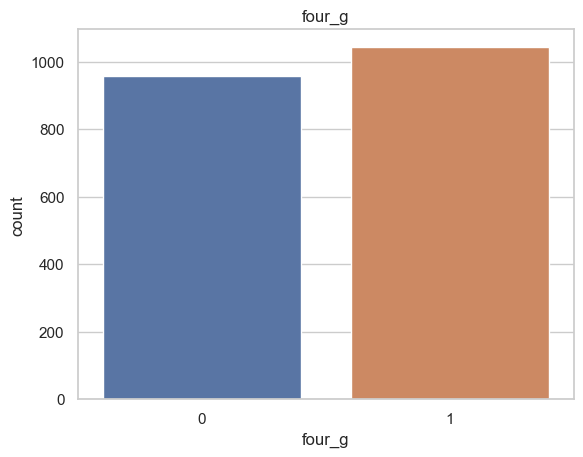

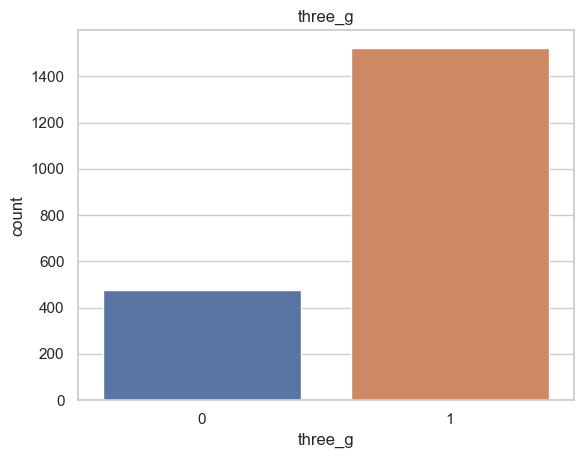

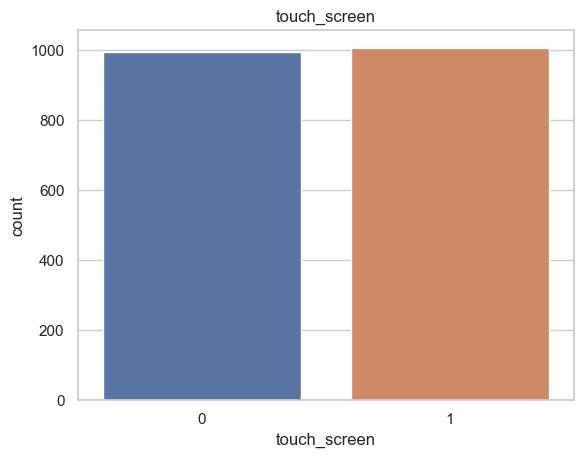

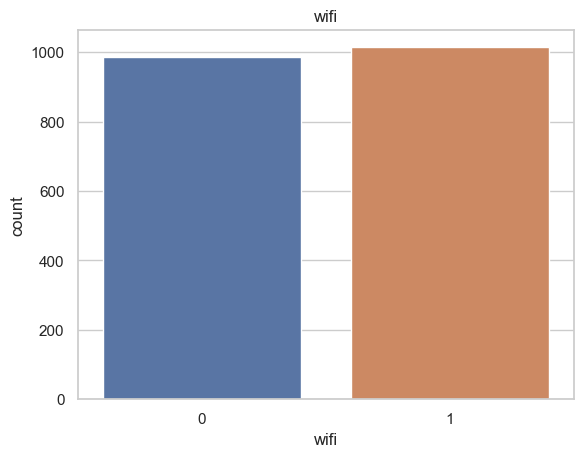

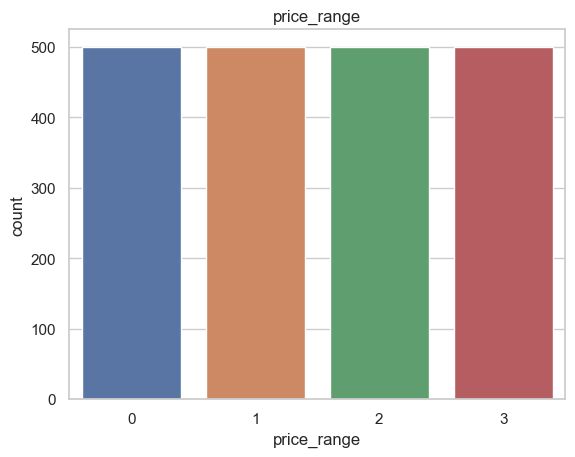

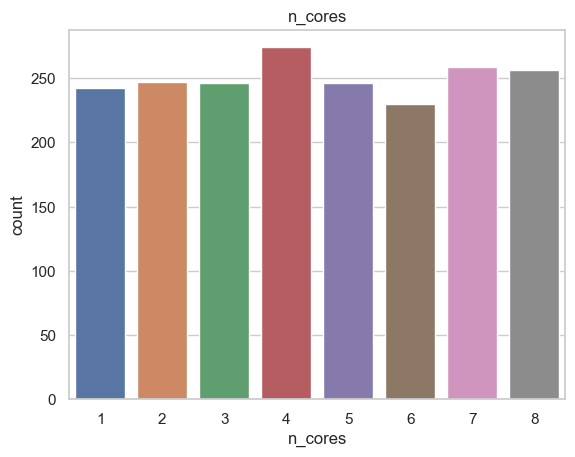

In [83]:
columns_to_display = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range', 'n_cores']

for column in columns_to_display:
    plt.figure()
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.show()


**Single unique value count**

In [84]:
unique_values = sorted(df['clock_speed'].unique())
print(unique_values)

[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]


### Pickle file

In [86]:
import pickle

# Save the Decision Tree classifier
pickle.dump(DT_clf, open('dt_clf_model.sav', 'wb'))

# Save the KNN classifier
pickle.dump(KNN_clf, open('knn_clf_model.sav', 'wb'))

# Save the Logistic Regression classifier
pickle.dump(LR_clf, open('lr_clf_model.sav', 'wb'))

# Save the Naive Bayes classifier
pickle.dump(NB_clf, open('nb_clf_model.sav', 'wb'))

# Save the Random Forest classifier
pickle.dump(RF_clf, open('rf_clf_model.sav', 'wb'))

# Save the Gradient Boosting classifier
pickle.dump(GB_clf, open('gb_clf_model.sav', 'wb'))

# Save the SVM classifier
pickle.dump(SVM_clf, open('svm_clf_model.sav', 'wb'))

# Save the Bagging classifier
pickle.dump(bagging_clf, open('bagging_clf_model.sav', 'wb'))

# Save the Boosting classifier
pickle.dump(boosting_clf, open('boosting_clf_model.sav', 'wb'))

# Save the Stacking classifier
pickle.dump(stacking_clf, open('stacking_clf_model.sav', 'wb'))

# Save the Voting classifier
pickle.dump(voting_clf, open('voting_clf_model.sav', 'wb'))